In [1]:
from netCDF4 import Dataset
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble


In [2]:
airTemp = '../../global-longrun_jedi-dvgm_inputs_outputs/tas.nc'
netLongRadiantionFlux = '../../global-longrun_jedi-dvgm_inputs_outputs/rlns.nc'
shortwaveRadiation = '../../global-longrun_jedi-dvgm_inputs_outputs/rsds.nc'
precipitation = '../../global-longrun_jedi-dvgm_inputs_outputs/pr.nc'
output = '../../global-longrun_jedi-dvgm_inputs_outputs/jedi_output.nc'

landSeaMask = '../../global-longrun_jedi-dvgm_inputs_outputs/landsea.nc'
lantitude =  '../../global-longrun_jedi-dvgm_inputs_outputs/latitude.nc'
longitude = '../../global-longrun_jedi-dvgm_inputs_outputs/longitude.nc'
elevation = '../../global-longrun_jedi-dvgm_inputs_outputs/elevation.nc'
moisture = '../../global-longrun_jedi-dvgm_inputs_outputs/paw.nc'
spatialMetaData = '../../global-longrun_jedi-dvgm_inputs_outputs/globe_surf.nc'

airTempDataset = Dataset(airTemp)
netLongRadiantionFluxDataSet = Dataset(netLongRadiantionFlux)
shortwaveRadiationDataset = Dataset(shortwaveRadiation)
precipitationDataSet = Dataset(precipitation)
outputDataset = Dataset(output)

landSeaMaskDataset = Dataset(landSeaMask)
lantitudeDataset = Dataset(lantitude)
longitudeDataset = Dataset(longitude)
elevationDataset = Dataset(elevation)
moistureDataset = Dataset(moisture)
spatialMetaDataset = Dataset(spatialMetaData)

airTempArray = airTempDataset['tas'][:].squeeze()
netLongRadiantionFluxArray = netLongRadiantionFluxDataSet['rlns'][:].squeeze()
shortwaveRadiationArray = shortwaveRadiationDataset['rsds'][:].squeeze()
precipitationArray = precipitationDataSet['pr'][:].squeeze()
NPPArray = outputDataset['NPP'][:].squeeze()
landSeaMaskArray = landSeaMaskDataset['var1'][:].squeeze()
lantitudeArray = lantitudeDataset['lat'][:].squeeze()
longitudeArray = longitudeDataset['lon'][:].squeeze()
elevationArray = elevationDataset['data'][:].squeeze()
moistureArray = moistureDataset['paw'][:].squeeze()
spatialMetaDataArray = spatialMetaDataset['lev']




In [3]:
print('airTempArray'+str(np.shape(airTempArray)))
print('netLongRadiantionFluxArray'+str(np.shape(netLongRadiantionFluxArray)))
print('shortwaveRadiationArray'+str(np.shape(shortwaveRadiationArray)))
print('precipitationArray'+str(np.shape(precipitationArray)))
print('NPPArray'+str(np.shape(NPPArray)))
print('landSeaMaskArray'+str(np.shape(landSeaMaskArray)))
print('lantitudeArray'+str(np.shape(lantitudeArray)))
print('longitudeArray'+str(np.shape(longitudeArray)))
print('elevationArray'+str(np.shape(elevationArray)))
print('moistureArray'+str(np.shape(moistureArray)))
print('spatialMetaDataArray'+str(np.shape(spatialMetaDataArray)))

airTempArray(3516, 145, 192)
netLongRadiantionFluxArray(3516, 145, 192)
shortwaveRadiationArray(3516, 145, 192)
precipitationArray(3516, 145, 192)
NPPArray(3516, 145, 192)
landSeaMaskArray(145, 192)
lantitudeArray(145,)
longitudeArray(192,)
elevationArray(145, 192)
moistureArray(145, 192)
spatialMetaDataArray()


In [4]:
newlantitudeArray = [[0] * 192 for i in range(145)]
for i in range(145):
    for j in range(192):
        newlantitudeArray[i][j] = lantitudeArray[i]

newlongitudeArray = [[] for i in range(145)]
for i in range(145):
    newlongitudeArray[i] = longitudeArray

newlantitudeArray = np.array(newlantitudeArray)
newlongitudeArray = np.array(newlongitudeArray)

In [5]:
# process static data 
import pandas as pd
landSeaMaskArray_flatten = landSeaMaskArray.reshape(145*192)
lantitudeArray_flatten = newlantitudeArray.reshape(145*192)
longitudeArray_flatten = newlongitudeArray.reshape(145*192)
elevationArray_flatten = elevationArray.reshape(145*192)
moistureArray_flatten = moistureArray.reshape(145*192)
geo_attri_multi = np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten))).repeat(repeats=5,axis=0)
geo_attri = np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten)))
static_data = pd.DataFrame(geo_attri_multi)
static_data_non_multi = pd.DataFrame(geo_attri)
static_data = static_data.rename(columns={0: 'landSea', 1: 'lantitude', 2: 'longitude', 3: 'elevation', 4: 'moisture'})
static_data_non_multi= static_data_non_multi.rename(columns={0: 'landSea', 1: 'lantitude', 2: 'longitude', 3: 'elevation', 4: 'moisture'})


In [6]:
pd.DataFrame(np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten))))

,0,1,2,3,4
0,0.0,90.0,0.000,-4226.0,0.105
1,0.0,90.0,1.875,-4226.0,0.105
2,0.0,90.0,3.750,-4226.0,0.105
3,0.0,90.0,5.625,-4226.0,0.105
4,0.0,90.0,7.500,-4226.0,0.105
...,...,...,...,...,...
27835,0.0,-90.0,350.625,2833.0,0.105
27836,0.0,-90.0,352.500,2833.0,0.105
27837,0.0,-90.0,354.375,2833.0,0.105
27838,0.0,-90.0,356.250,2833.0,0.105


In [7]:
static_data_non_multi

,landSea,lantitude,longitude,elevation,moisture
0,0.0,90.0,0.000,-4226.0,0.105
1,0.0,90.0,1.875,-4226.0,0.105
2,0.0,90.0,3.750,-4226.0,0.105
3,0.0,90.0,5.625,-4226.0,0.105
4,0.0,90.0,7.500,-4226.0,0.105
...,...,...,...,...,...
27835,0.0,-90.0,350.625,2833.0,0.105
27836,0.0,-90.0,352.500,2833.0,0.105
27837,0.0,-90.0,354.375,2833.0,0.105
27838,0.0,-90.0,356.250,2833.0,0.105


In [8]:
# for features of static data，get the average value of 3516 months
# NPPArray[0] = 145
# NPPArray[0][0] = 192
# NPPArray = 3516
ave = []
for i in range(0, len(NPPArray[0])):
    for j in range(0, len(NPPArray[0][0])):
        temp = 0
        for k in range(0, len(NPPArray)):
            temp += NPPArray[k][i][j]
        ave.append(temp/len(NPPArray))


In [9]:
count = 0
for i in range(len(ave)):
    if ave[i] == 0:
        count += 1
print(count)

19747


In [10]:
static_data_non_multi['NPP'] = ave

In [12]:
static_data_non_multi

,landSea,lantitude,longitude,elevation,moisture,NPP
0,0.0,90.0,0.000,-4226.0,0.105,0.0
1,0.0,90.0,1.875,-4226.0,0.105,0.0
2,0.0,90.0,3.750,-4226.0,0.105,0.0
3,0.0,90.0,5.625,-4226.0,0.105,0.0
4,0.0,90.0,7.500,-4226.0,0.105,0.0
...,...,...,...,...,...,...
27835,0.0,-90.0,350.625,2833.0,0.105,0.0
27836,0.0,-90.0,352.500,2833.0,0.105,0.0
27837,0.0,-90.0,354.375,2833.0,0.105,0.0
27838,0.0,-90.0,356.250,2833.0,0.105,0.0


In [13]:
# delete rows with 0 NPP
label = []
for i in range(len(ave)):
    if not static_data_non_multi.iloc[i,5]:
        label.append(i)
for i in range(len(label)):
    static_data_non_multi = static_data_non_multi.drop(label[i])
print(len(label))

19747


In [14]:
static_data_non_multi

,landSea,lantitude,longitude,elevation,moisture,NPP
2484,1.0,75.00,337.500,1293.0,0.060,-0.000164
2485,1.0,75.00,339.375,533.0,0.105,-0.000147
2486,1.0,75.00,341.250,-11.0,0.105,-0.000007
2623,1.0,73.75,238.125,276.0,0.075,-0.000017
2624,1.0,73.75,240.000,264.0,0.075,-0.002736
...,...,...,...,...,...,...
22427,1.0,-55.00,290.625,176.0,0.060,0.067544
22428,1.0,-55.00,292.500,56.0,0.105,0.071823
22433,0.0,-55.00,301.875,-3428.0,0.105,0.000624
22434,0.0,-55.00,303.750,-574.0,0.105,0.000271


In [15]:
# split train set and test set
x_train_static, x_test_static, y_train_static, y_test_static = train_test_split(static_data_non_multi[['landSea', 'lantitude', 'longitude', 'elevation', 'moisture']], 
                                                    static_data_non_multi['NPP'], random_state=100, train_size=0.8)

In [16]:
# Linear regression 
model_linear = LinearRegression()
model_linear.fit(x_train_static, y_train_static)
predict_score = model_linear.score(x_test_static, y_test_static)
print(predict_score)

0.32540827587429055


Best tree number: 80
Highest accuracy: 0.9647


Text(0.5, 1.0, 'static features + NPP')

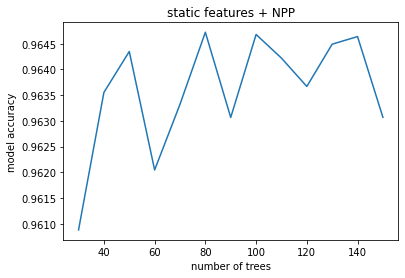

In [17]:
# RandomForest：select best tree number which has highest accuracy 
rf_value = []
best_tree_number = 0
max_v = 0
for i in range(30,160,10):
    model_randomforest = ensemble.RandomForestRegressor(n_estimators=i)
    model_randomforest.fit(x_train_static, y_train_static)
    predict_score = model_randomforest.score(x_test_static, y_test_static)
    if predict_score > max_v:
        max_v = predict_score 
        best_tree_number = i
    rf_value.append(predict_score)
tree_number = [i for i in range(30,160,10)]
print("Best tree number:", best_tree_number)
print("Highest accuracy:", round(max_v,4))
plt.plot(tree_number,rf_value)
plt.xlabel("number of trees")
plt.ylabel("model accuracy")
plt.title("static features + NPP")

MSE Train: 0.003, Test: 0.026
R2_Score Train: 0.995, Test: 0.966


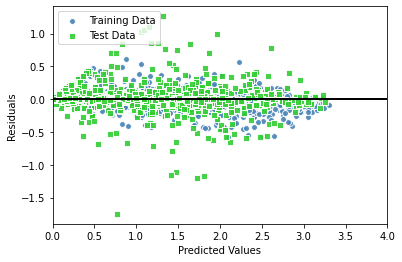

In [24]:
from sklearn.metrics import mean_squared_error,r2_score

y_train_pred=model_randomforest.predict(x_train_static)
y_test_pred=model_randomforest.predict(x_test_static)

print("MSE Train: %.3f, Test: %.3f" % (mean_squared_error(y_train_static,y_train_pred),
                                       mean_squared_error(y_test_static,y_test_pred)))
print("R2_Score Train: %.3f, Test: %.3f" % (r2_score(y_train_static,y_train_pred),
                                            r2_score(y_test_static,y_test_pred)))

plt.scatter(y_train_pred,y_train_pred-y_train_static,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test_static,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([0,4])
plt.savefig('./fig1.png')
plt.show()
